<h1>ANALISIS PERILAKU KONSUMEN </h1>

<h2>1. Exploratory Data Analysis (EDA)</h2>

In [11]:
#IMPORT LIBRARY YANG DIBUTUHKAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
#MEMUAT FILE DARI LOKASI PENYIMPANAN
df = pd.read_csv('shopeefood.csv')
df.head()

,restoran,kategori,rating,jumlah_pembeli,jarak,waktu,harga,volume_transaksi,menu
0,Rocket Chicken Bancarkembar,Ayam,4.7,900,1.6,20,23929,21536100,Rocket 7
1,Rocket Chicken Pabuaran,Ayam,4.7,800,2.1,25,13161,10528800,Rocket 1
2,Warung Sate Ayam,Ayam,4.9,700,0.7,26,22972,16080400,Sate Ayam + Nasi
3,Bakri Ayam Bakar Crispy Grendeng,Ayam,4.7,1000,0.5,25,24886,24886000,Ayam Bakri Dada Hot & Cheese
4,Ayam Tulang Lunak Triwindu,Ayam,4.9,2000,0.8,21,30629,61258000,Nasi Ayam Jumbo Tulang Lunak Bakar


In [13]:
print(df.dtypes)

restoran             object
kategori             object
rating              float64
jumlah_pembeli        int64
jarak               float64
waktu                 int64
harga                 int64
volume_transaksi      int64
menu                 object
dtype: object


<h3>A. DESCRIPTIVE STATISTICS</h3>

In [14]:
df.describe()

,rating,jumlah_pembeli,jarak,waktu,harga,volume_transaksi
count,57.000000,57.000000,57.000000,57.000000,57.000000,5.700000e+01
mean,4.759649,1547.368421,0.942105,30.035088,25221.000000,3.876968e+07
std,0.101523,1825.132604,1.194324,4.403590,10147.857439,4.456557e+07
min,4.500000,500.000000,0.100000,20.000000,7179.000000,3.589500e+06
25%,4.700000,600.000000,0.200000,27.000000,18664.000000,1.447200e+07
50%,4.800000,1000.000000,0.400000,31.000000,23929.000000,2.392900e+07
75%,4.800000,1000.000000,1.000000,33.000000,28715.000000,3.912860e+07
max,4.900000,10000.000000,4.900000,40.000000,55898.000000,1.952600e+08


<h3>B. MEMBUAT HISTOGRAM UNTUK MEMAHAMI DISTRIBUSI DATA</h3>

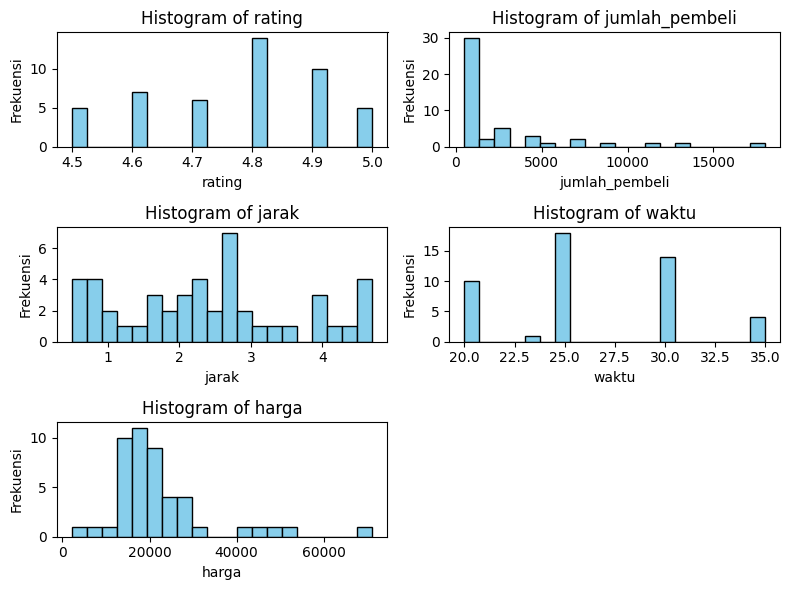

In [14]:
# Columns to plot histograms for
columns = ['rating','jumlah_pembeli','jarak','waktu','harga','volume_transaksi']

# Plot histograms for each column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))

for i, col in enumerate(columns):
    ax = axes[i // 2, i % 2]
    df[col].plot(kind='hist', bins=20, ax=ax, title=f'Histogram of {col}', color='skyblue', edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Frekuensi')

# Adjust layout and remove empty subplot
fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.savefig('gf_histogram.png',  bbox_inches='tight')
plt.show()

<h3>C. TOP & BOTTOM 5 (rating_avg vs menu) </h3>

<h4>DAFTAR 5 MENU MAKANAN DENGAN RATING TERTINGGI</h4>

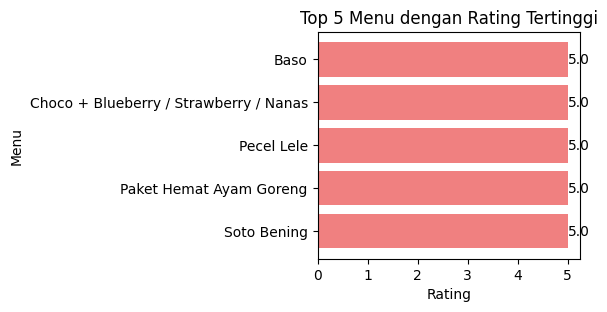

In [15]:
# Memilih 5 nilai terendah berdasarkan rating_avg
top_5 = df.nlargest(5, 'rating')[['menu', 'rating']]
# Membuat bar chart horizontal
plt.figure(figsize=(6, 3))
bars = plt.barh(top_5['menu'], top_5['rating'], color='lightcoral')

# Menambahkan nilai pada ujung batang
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center')  # va: vertical alignment

plt.xlabel('Rating')
plt.ylabel('Menu')
plt.tight_layout()
plt.title('Top 5 Menu dengan Rating Tertinggi')
plt.savefig('gf_top5menurating.png', bbox_inches='tight')
plt.show()

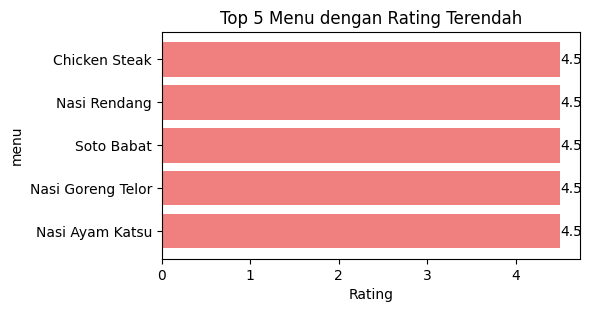

In [16]:
# Memilih 5 nilai terendah berdasarkan rating_avg
bottom_5 = df.nsmallest(5, 'rating')[['menu', 'rating']]

# Membuat bar chart horizontal
plt.figure(figsize=(6, 3))
bars = plt.barh(bottom_5['menu'], bottom_5['rating'], color='lightcoral')

# Menambahkan nilai pada ujung batang
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center')  # va: vertical alignment

plt.xlabel('Rating')
plt.ylabel('menu')
plt.tight_layout()
plt.title('Top 5 Menu dengan Rating Terendah')
plt.savefig('gf_low5menurating.png', bbox_inches='tight')
plt.show()

<h3>D. TOP & BOTTOM 5 (rating_count vs menu)</h3>

<h4>DAFTAR 5 MENU MAKANAN YANG PALING BANYAK DIPESAN</h4>

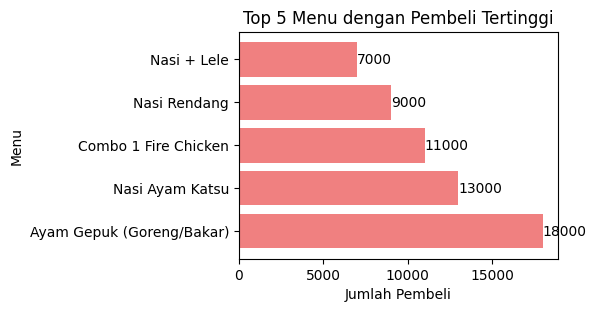

In [17]:
# Memilih 5 nilai terendah berdasarkan rating_avg
top_5 = df.nlargest(5, 'jumlah_pembeli')[['menu', 'jumlah_pembeli']]

# Membuat bar chart horizontal
plt.figure(figsize=(6, 3))
bars = plt.barh(top_5['menu'], top_5['jumlah_pembeli'], color='lightcoral')

# Menambahkan nilai pada ujung batang
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center')  # va: vertical alignment

plt.xlabel('Jumlah Pembeli')
plt.ylabel('Menu')
plt.tight_layout()
plt.title('Top 5 Menu dengan Pembeli Tertinggi')
plt.savefig('gf_top5banyakdibeli.png' , bbox_inches='tight')
plt.show()

<h4>DAFTAR 5 MENU MAKANAN YANG PALING SEDIKIT DIPESAN</h4>

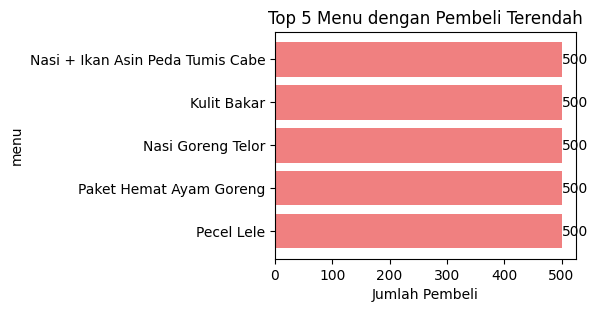

In [18]:
# Memilih 5 nilai terendah berdasarkan rating_avg
bottom_5 = df.nsmallest(5, 'jumlah_pembeli')[['menu', 'jumlah_pembeli']]

# Membuat bar chart horizontal
plt.figure(figsize=(6, 3))
bars = plt.barh(bottom_5['menu'], bottom_5['jumlah_pembeli'], color='lightcoral')

# Menambahkan nilai pada ujung batang
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center')  # va: vertical alignment

plt.xlabel('Jumlah Pembeli')
plt.ylabel('menu')
plt.tight_layout()
plt.title('Top 5 Menu dengan Pembeli Terendah')
plt.savefig('gf_low5sedikitdibeli.png', bbox_inches='tight')
plt.show()

<h3>E. TOP & BOTTOM 5 (harga vs menu)</h3>

<h4>TOP 5 MENU</h4>

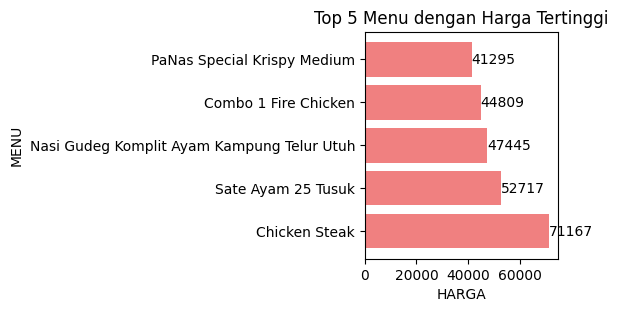

In [19]:
# Memilih 5 nilai terendah berdasarkan rating_avg
top_5 = df.nlargest(5, 'harga')[['menu', 'harga']]

# Membuat bar chart horizontal
plt.figure(figsize=(6, 3))
bars = plt.barh(top_5['menu'], top_5['harga'], color='lightcoral')

# Menambahkan nilai pada ujung batang
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center')  # va: vertical alignment

plt.xlabel('HARGA')
plt.ylabel('MENU')
plt.tight_layout()
plt.title('Top 5 Menu dengan Harga Tertinggi')
plt.savefig('gf_top5hargatinggi.png', bbox_inches='tight')
plt.show()

<h4>BOTTOM 5 MENU</h4>

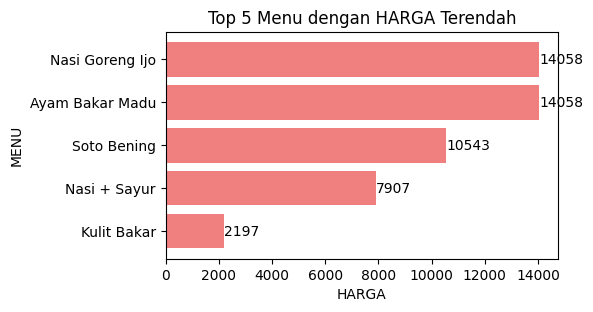

In [20]:
# Memilih 5 nilai terendah berdasarkan rating_avg
bottom_5 = df.nsmallest(5, 'harga')[['menu', 'harga']]

# Membuat bar chart horizontal
plt.figure(figsize=(6, 3))
bars = plt.barh(bottom_5['menu'], bottom_5['harga'], color='lightcoral')

# Menambahkan nilai pada ujung batang
for bar in bars:
    xval = bar.get_width()
    plt.text(xval, bar.get_y() + bar.get_height()/2, round(xval, 2), va='center')  # va: vertical alignment

plt.xlabel('HARGA')
plt.ylabel('MENU')
plt.tight_layout()
plt.title('Top 5 Menu dengan HARGA Terendah')
plt.savefig('gf_low5hargarendah.png', bbox_inches='tight')
plt.show()

<h3>F. KOMPOSISI JENIS MAKANAN BERDASARKAN JUMLAH PEMBELI</h3>

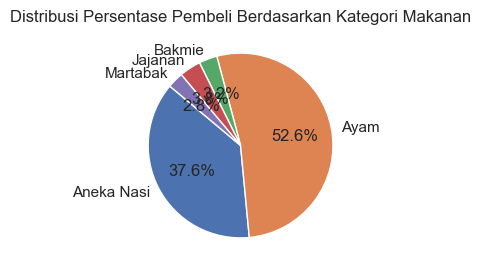

In [42]:

# Mengelompokkan data berdasarkan jenis makanan dan menjumlahkan jumlah pembeli
df_grouped = df.groupby('kategori')['jumlah_pembeli'].sum().reset_index()

# Plotting menggunakan seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))

# Membuat pie chart menggunakan matplotlib
plt.pie(df_grouped['jumlah_pembeli'], labels=df_grouped['kategori'], autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Persentase Pembeli Berdasarkan Kategori Makanan')

plt.show()

<h3>H. HEATMAP</h3>

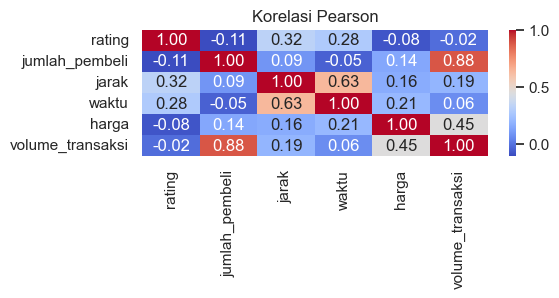

In [22]:
# Correlation analysis
corr_matrix = df[['rating', 'jumlah_pembeli', 'jarak', 'waktu', 'harga', 'volume_transaksi']].corr()

#Plotting the correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.tight_layout()
plt.title('Korelasi Pearson')
plt.savefig('gf_pearson.png', bbox_inches='tight')
plt.show()

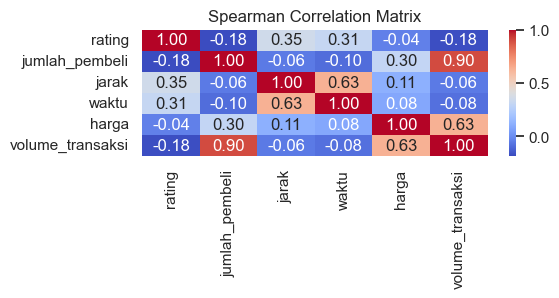

In [26]:
# Calculate Spearman correlation matrix
df1 = df[['rating', 'jumlah_pembeli', 'jarak', 'waktu', 'harga', 'volume_transaksi']]
spearman_corr = df1.corr(method='spearman')

# Plot the heatmap of the Spearman correlation matrix
plt.figure(figsize=(6, 3))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.tight_layout()
plt.title('Spearman Correlation Matrix')
plt.savefig('gf_spearman.png', bbox_inches='tight')
plt.show()

<h3> I. BIVARIATE ANALYSIS (REGRESSION LINEAR)</h3>

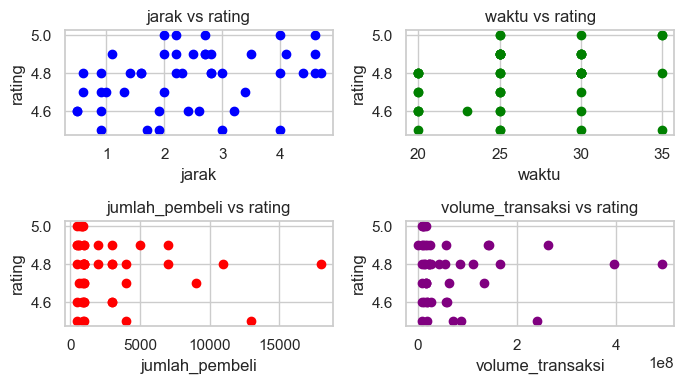

In [23]:
import matplotlib.pyplot as plt

# Data sampel
rating = df['rating']
jarak = df['jarak']
waktu = df['waktu']
jumlah_pembeli = df['jumlah_pembeli']
harga = df['harga']
volume_transaksi = df['volume_transaksi']

# Membuat subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 4))

# Scatter plot untuk x1 vs y
axes[0, 0].scatter(jarak, rating, color='blue')
axes[0, 0].set_title('jarak vs rating')
axes[0, 0].set_xlabel('jarak')
axes[0, 0].set_ylabel('rating')

# Scatter plot untuk x2 vs y
axes[0, 1].scatter(waktu, rating, color='green')
axes[0, 1].set_title('waktu vs rating')
axes[0, 1].set_xlabel('waktu')
axes[0, 1].set_ylabel('rating')

# Scatter plot untuk x3 vs y
axes[1, 0].scatter(jumlah_pembeli, rating, color='red')
axes[1, 0].set_title('jumlah_pembeli vs rating')
axes[1, 0].set_xlabel('jumlah_pembeli')
axes[1, 0].set_ylabel('rating')

# Scatter plot untuk x4 vs y
axes[1, 1].scatter(volume_transaksi, rating, color='purple')
axes[1, 1].set_title('volume_transaksi vs rating')
axes[1, 1].set_xlabel('volume_transaksi')
axes[1, 1].set_ylabel('rating')

# Menampilkan plot
plt.tight_layout()
plt.savefig('gf_sctotal.png')
plt.show()


<h5>jarak vs rating</h5>

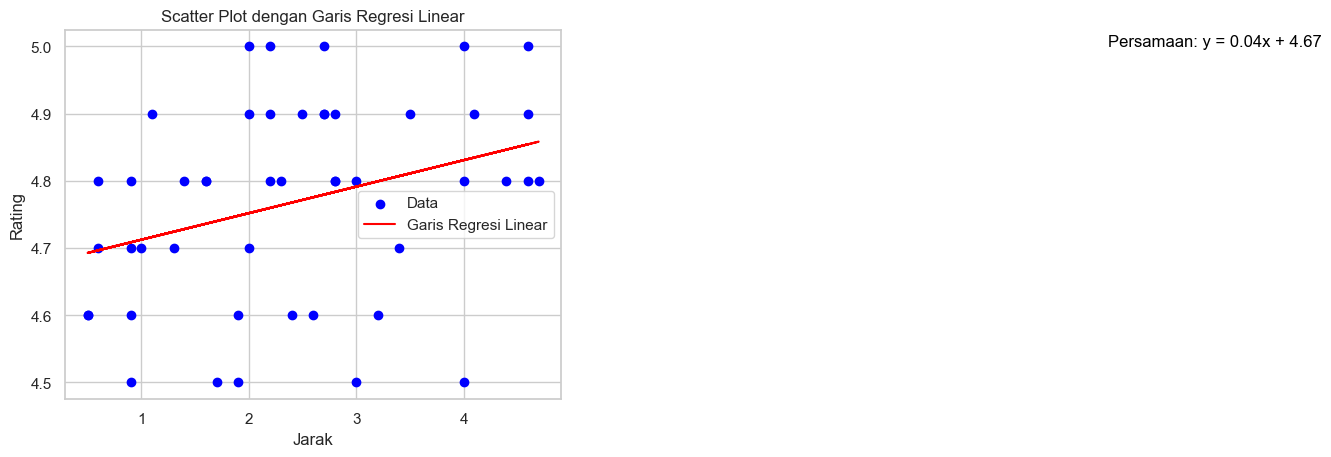

In [18]:
# Scatter plots

# Menyiapkan data
x = df['jarak'].values.reshape(-1, 1)  # Mengubah ke bentuk array NumPy dan reshape
y = df['rating'].values

# Membuat scatter plot
plt.scatter(x, y, label='Data', color='blue')

# Membuat model regresi linear
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Menambahkan garis regresi
plt.plot(df['jarak'], y_pred, color='red', label='Garis Regresi Linear')

# Menghitung koefisien regresi
slope = model.coef_[0]
intercept = model.intercept_

# Menambahkan persamaan garis ke dalam plot
equation_text = f'Persamaan: y = {slope:.2f}x + {intercept:.2f}'
plt.text(10, 5, equation_text, fontsize=12, color='black')

# Menambahkan label dan judul
plt.xlabel('Jarak')
plt.ylabel('Rating')
plt.title('Scatter Plot dengan Garis Regresi Linear')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()


<h5>jarak vs rating</h5>

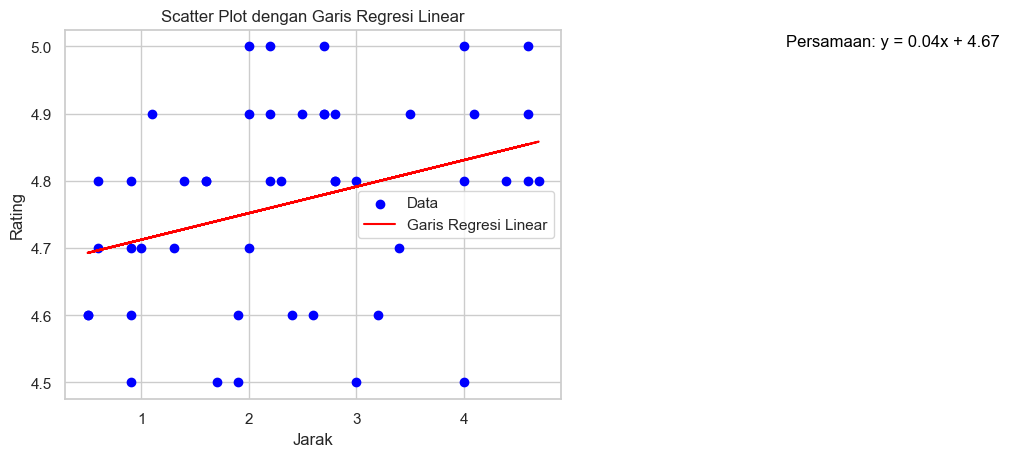

In [24]:
# Scatter plots

# Menyiapkan data
x = df['jarak'].values.reshape(-1, 1)  # Mengubah ke bentuk array NumPy dan reshape
y = df['rating'].values

# Membuat scatter plot
plt.scatter(x, y, label='Data', color='blue')

# Membuat model regresi linear
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Menambahkan garis regresi
plt.plot(df['jarak'], y_pred, color='red', label='Garis Regresi Linear')

# Menghitung koefisien regresi
slope = model.coef_[0]
intercept = model.intercept_

# Menambahkan persamaan garis ke dalam plot
equation_text = f'Persamaan: y = {slope:.2f}x + {intercept:.2f}'
plt.text(7, 5, equation_text, fontsize=12, color='black')

# Menambahkan label dan judul
plt.xlabel('Jarak')
plt.ylabel('Rating')
plt.title('Scatter Plot dengan Garis Regresi Linear')

# Menambahkan legenda
plt.legend()
plt.savefig('gf_scjarakvsrating')
# Menampilkan plot
plt.show()


<h2>2. MULTIPLE REGRESSION LINEAR</h2>

In [25]:
import statsmodels.api as sm
X = df[['jumlah_pembeli', 'jarak', 'waktu', 'harga', 'volume_transaksi']]
y = df['rating']

X = sm.add_constant(X)

model = sm.OLS(y,X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 rating   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     1.922
Date:                Wed, 24 Jul 2024   Prob (F-statistic):              0.112
Time:                        06:01:29   Log-Likelihood:                 27.766
No. Observations:                  47   AIC:                            -43.53
Df Residuals:                      41   BIC:                            -32.43
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                4.6848      0.144     32.568      0.000       4.394       4.975
jumlah_pembeli   -2.524e-05   1.55e-05     -1.632      0.110   -5.65e-05       6e-06
jarak                0.0277      0.023      1.219      0.230      -0.018       0.073
waktu                0.0045      0.006      0.724      0.473      -0.008       0.017
harga            -4.198e-06   2.47e-06     -1.698      0.097   -9.19e-06    7.95e-07
volume_transaksi  9.144e-10    6.2e-10      1.474      0.148   -3.38e-10    2.17e-09
==============================================================================
Omnibus:                        4.259   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                2.435
Skew:                          -0.326   Prob(JB):                        0.296
Kurtosis:                       2.095   Cond. No.                     8.23e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.23e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<h2>3. CLUSTERING</h2>

In [15]:
#Import Libabry yang dibutuhkan
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [16]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['harga','rating']])
y_predicted

array([0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 0,
       0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 0, 1, 2,
       0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 0, 0], dtype=int32)

In [17]:
df['cluster'] = y_predicted
df.head()

,restoran,kategori,rating,jumlah_pembeli,jarak,waktu,harga,volume_transaksi,menu,cluster
0,Rocket Chicken Bancarkembar,Ayam,4.7,900,1.6,20,23929,21536100,Rocket 7,0
1,Rocket Chicken Pabuaran,Ayam,4.7,800,2.1,25,13161,10528800,Rocket 1,2
2,Warung Sate Ayam,Ayam,4.9,700,0.7,26,22972,16080400,Sate Ayam + Nasi,0
3,Bakri Ayam Bakar Crispy Grendeng,Ayam,4.7,1000,0.5,25,24886,24886000,Ayam Bakri Dada Hot & Cheese,0
4,Ayam Tulang Lunak Triwindu,Ayam,4.9,2000,0.8,21,30629,61258000,Nasi Ayam Jumbo Tulang Lunak Bakar,0


In [18]:
km.cluster_centers_

array([[2.56218438e+04, 4.77812500e+00],
       [4.51776250e+04, 4.82500000e+00],
       [1.50751176e+04, 4.69411765e+00]])

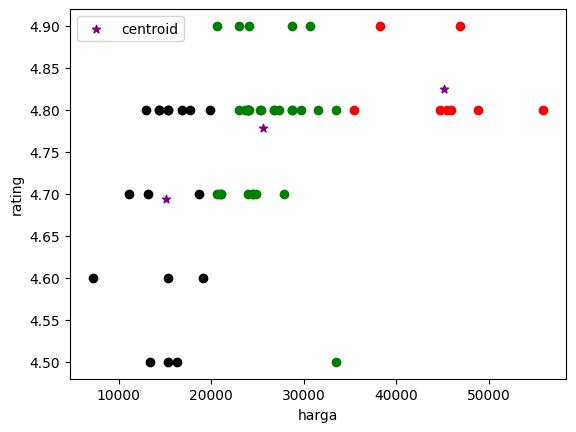

In [19]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.harga,df1['rating'],color='green')
plt.scatter(df2.harga,df2['rating'],color='red')
plt.scatter(df3.harga,df3['rating'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('harga')
plt.ylabel('rating')
plt.legend()

In [20]:
#PREPROCESSING DATA

scaler = MinMaxScaler()

scaler.fit(df[['rating']])
df['rating'] = scaler.transform(df[['rating']])

scaler.fit(df[['harga']])
df['harga'] = scaler.transform(df[['harga']])

df.head()

,restoran,kategori,rating,jumlah_pembeli,jarak,waktu,harga,volume_transaksi,menu,cluster
0,Rocket Chicken Bancarkembar,Ayam,0.5,900,1.6,20,0.343808,21536100,Rocket 7,0
1,Rocket Chicken Pabuaran,Ayam,0.5,800,2.1,25,0.122786,10528800,Rocket 1,2
2,Warung Sate Ayam,Ayam,1.0,700,0.7,26,0.324165,16080400,Sate Ayam + Nasi,0
3,Bakri Ayam Bakar Crispy Grendeng,Ayam,0.5,1000,0.5,25,0.363452,24886000,Ayam Bakri Dada Hot & Cheese,0
4,Ayam Tulang Lunak Triwindu,Ayam,1.0,2000,0.8,21,0.481332,61258000,Nasi Ayam Jumbo Tulang Lunak Bakar,0


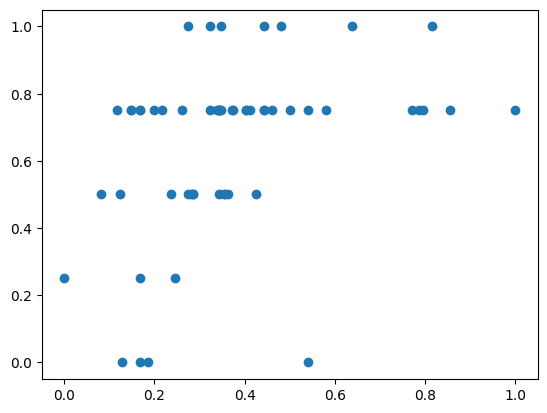

In [21]:
plt.scatter(df.harga,df['rating'])

In [22]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['harga','rating']])
y_predicted

array([0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 1], dtype=int32)

In [26]:
df['cluster']=y_predicted
df.to_csv('new_shopee1233.csv', index=False)

In [23]:
km.cluster_centers_

array([[0.25477362, 0.35526316],
       [0.33427821, 0.79166667],
       [0.77995495, 0.8125    ]])

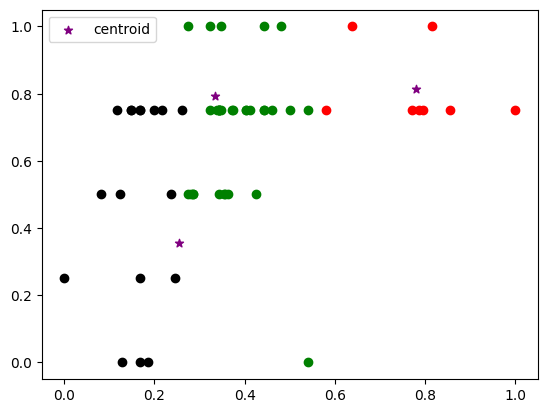

In [24]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.harga,df1['rating'],color='green')
plt.scatter(df2.harga,df2['rating'],color='red')
plt.scatter(df3.harga,df3['rating'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()
plt.savefig('gf_cluster.png')
plt.show()

In [25]:
#ELBOW

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['harga','rating']])
    sse.append(km.inertia_)

sse

[6.037085411029388,
 3.195456931373062,
 2.042602466987727,
 1.2282972726762005,
 0.9366813141479086,
 0.8355805595225989,
 0.6004643332171323,
 0.5616744511677083,
 0.3730376422697688]

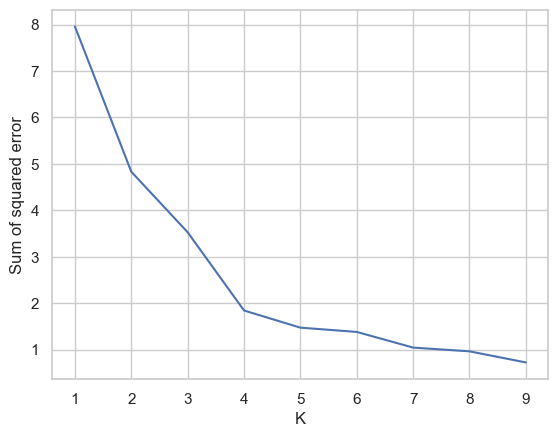

In [88]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.savefig('gf_elbow.png')
plt.show()